---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Hernando Peralta L**
- Carné: **B35188**
- Grupo: **1/2**


# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

# 1. Asignaciones

## 1.1 Determinación teórica del número $s$

### Parametros dados:

La tasa de llegada $\lambda = 4$ y es constante durante ocho horas.

La tasa de servicio $\nu = 0.25$ y es constante durante ocho horas.

El sistema no debe exceder 50 personas en fila durante el 95% del tiempo de servicio.


Hay que tener en cuenta que tenemos a 50 perosnas en fila, donde se atiende a 1, por lo que el total de perosnas son 51
$$
P( \text{51 o más clientes en el sistema} ) = \sum_{i=51}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{4} (1 - \rho) \rho^i = \rho^{51}
$$

durante el 95% del timepo:
$$
\begin{aligned}
P( \text{51 o más clientes en el sistema} ) = \rho^{51} & = \left( \frac{\lambda}{\nu} \right)^{51} \leq 0.05 \\
\end{aligned}
$$

Se sabe que $\rho$ se calcula de la sigeinte manera:
$$
\rho = \frac{\lambda}{s\cdot\nu}
$$

Donde $\lambda$ tiene un valor de 4 y $\nu$ un valor de 0.25

$$
\rho = \frac{16}{s}
$$

De la parte anterior llegamos a al conclusión de que $\rho^{51} \leq 0.05$, por lo tanto al resolver para s:

$$\left(\frac{16}{s}\right)^{51}\leq 0.05$$

$$ s \leq 16.968 $$

---


## 1.2 Modificar el código y corroborar el resultado

Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 48 solicitudes en fila:
	 94.46%
	 No cumple con la especificación.
Simulación es equivalente a 70.01 horas.


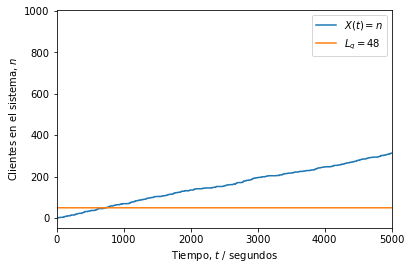

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60 #Lambda = 4 por min

# Parámetro de servicio para cada servidor (servicios/segundos)
nu = 0.25/60 #Se atienden 0.25 personas por min

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

#### se cambia aqui #######


#Vectores con los timepos de fin de servicio de cada servidor
servidores = np.zeros(s)






# Inicialización del tiempo de inicio y fin de atención del primer cliente
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

#Asignacion del primer cliente
servidores[0] = fin


#Pseudo Codigo
# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    desocupados = np.where(servidores <= t_llegadas[i])
    if no hay desocupados:
        inicio = min(servidores)+1
        fin = inicio + t_servicio[i]
        # Asignacion del servidor
        j = np.where(servidores == min(servidores))
        servidores[j] = fin
    else #si hay desocupados
        inicio = t_llegadas[i]
        fin = inicio + t_servicio[i]
        j = np.where(servidores == min(servidores))
        servidores [j] = fin
    t_atencion.append(inicio)

#Termina Pseudo codigo    
# no me ha dado tiempo de terminarlo
    
    
# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.01:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---